In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

Test Accuracy: 98.25 %

Confusion Matrix:
 [[41  2]
 [ 0 71]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



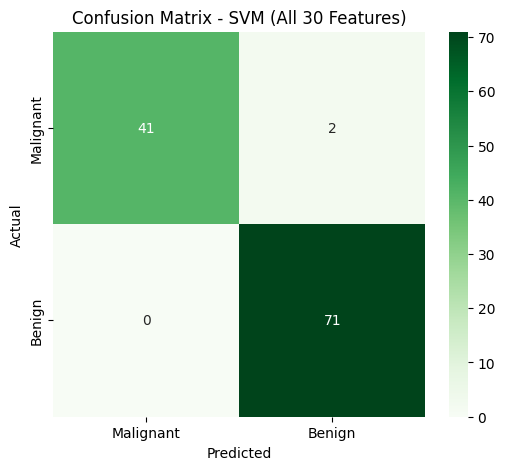

In [14]:
# Step 1: Imports
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load dataset
data = load_breast_cancer()
X = data.data      # All 30 features
y = data.target    # 0 = Malignant, 1 = Benign
feature_names = data.feature_names

# Step 3: Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM
svm_model = SVC(kernel='rbf', C=1.0, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Step 5: Evaluate model
y_pred = svm_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(accuracy * 100, 2), "%\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm, "\n")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Malignant','Benign'], yticklabels=['Malignant','Benign'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (All 30 Features)")
plt.show()
